# **Логистическая и линейные регрессии**

**Задача классификации на датасете data/data.csv. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ - *Churn*.**

Обучим модель классификатора логистической регрессии, используя безлайны без сильной обработки выборок и оценим точности предсказания с помощью основных метрик

  Размер: 7043 строк, 21 столбцов

Первые 3 строки данных:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

,Метрика,Значение
0,Accuracy,0.784954
1,Precision,0.630996
2,Recall,0.457219
3,F1-Score,0.530233
4,ROC-AUC,0.819100


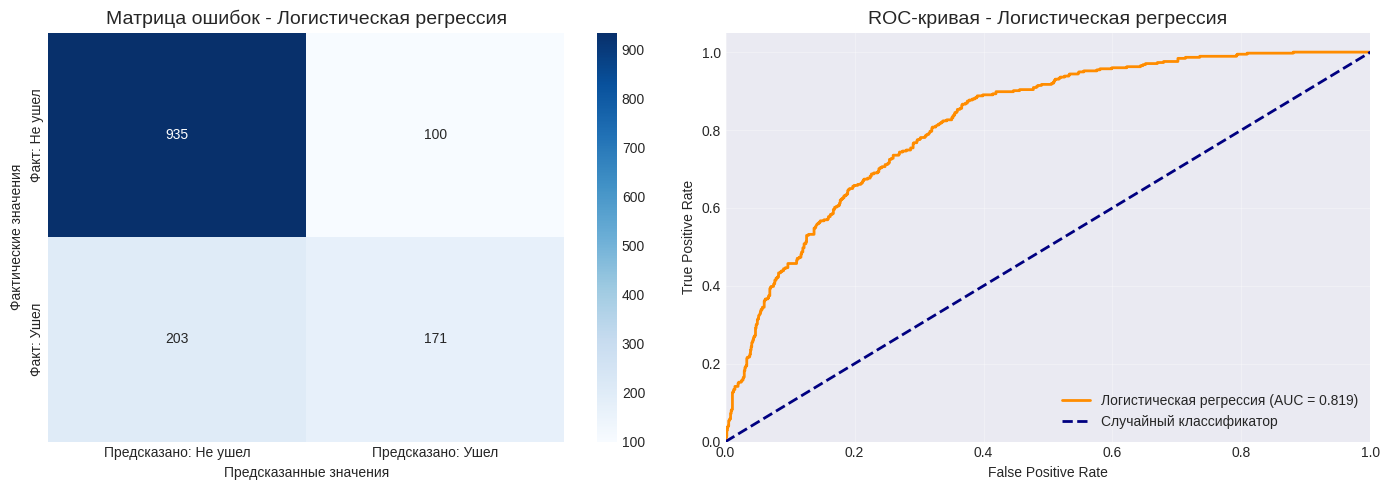

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('data/data.csv')
print(f"  Размер: {df.shape[0]} строк, {df.shape[1]} столбцов\n")

print("Первые 3 строки данных:")
display(df.head(3))
print("\nИнформация о столбцах:")
df.info()

df_clean = df.copy()

# удалим айди пользователя, он не требуется
df_clean = df_clean.drop('customerID', axis=1)

# преобразуем переменную TotalCharges и целевую переменную Churn
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', '0')
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])
df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# удалим категориальные признаки
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_numeric = df_clean.drop(categorical_cols, axis=1)

# все признаки для обучения
print("\nЧисловые признаки для бейзлайна:")
print(df_numeric.columns.tolist())
print(f"\nИтоговый размер данных для модели: {df_numeric.shape}")

# разделим на обучающую и тестовую выборки
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

print(f" признаки (X): {X.shape}")
print(f" целевая переменная (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {y_train.value_counts().to_dict()})")
print(f" Y_test: {y_test.shape} (распределение: {y_test.value_counts().to_dict()})")



# Создаем и обучаем модель логистической регрессии
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

print("\nОбучение завершено")

# Делаем предсказания
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

print("Предсказания сделаны")

# Оцениваем точность модели основными метриками
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba)

metrics_df_logreg = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg]
})

print("\nПолучившиеся метрики:")
display(metrics_df_logreg)

# Матрица ошибок для логистической регрессии
cm_logreg = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок - Логистическая регрессия', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая для логистической регрессии
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Логистическая регрессия (AUC = {roc_auc_logreg:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая - Логистическая регрессия', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Теперь имплиментируем классификатор логистической регрессии и обучим его на бейзлайне, посмотрим на метрики

  Размер: 7043 строк, 21 столбцов

Первые 3 строки данных:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

,Метрика,Значение
0,Accuracy,0.756565
1,Precision,0.620155
2,Recall,0.213904
3,F1-Score,0.318091
4,ROC-AUC,0.584173


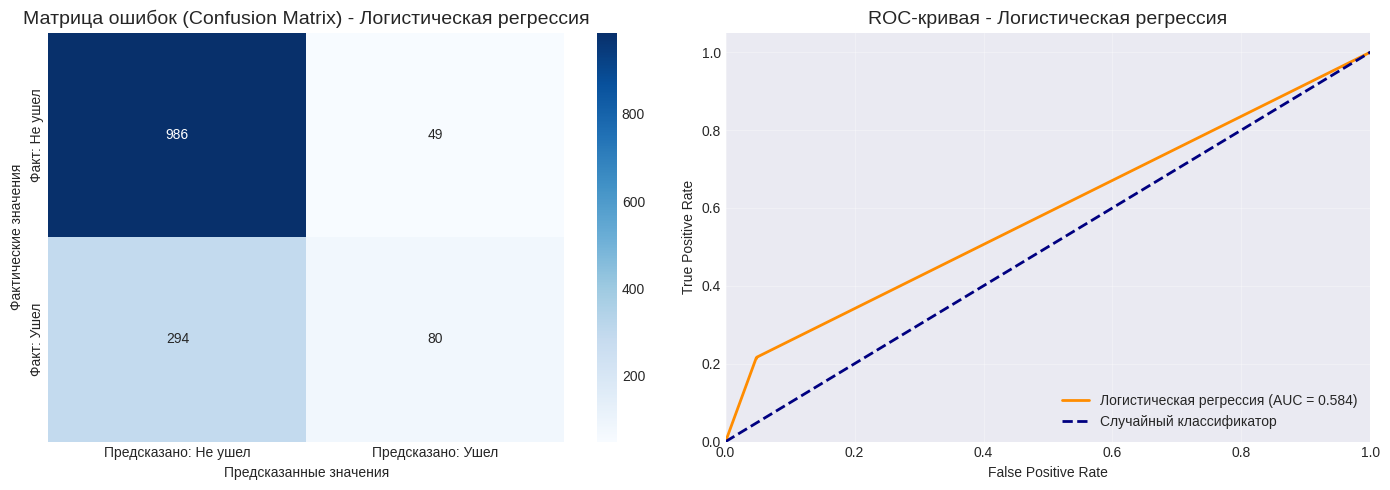

In [5]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns


#имплиментированная логистическая регрессия
class MyLogisticRegression:
    def __init__(self, C=1.0, penalty='l2', class_weight=None, max_iter=1000, random_state=42, learning_rate=0.1):
        self.C = C
        self.penalty = penalty
        self.class_weight = class_weight
        self.max_iter = max_iter
        self.random_state = random_state
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.classes_ = None
        self.class_weights_dict = None

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_class_weights(self, y):
        if self.class_weight == 'balanced':
            classes, counts = np.unique(y, return_counts=True)
            n_classes = len(classes)
            n_samples = len(y)
            weights = {}
            for i, cls in enumerate(classes):
                weights[cls] = n_samples / (n_classes * counts[i])
            return weights
        return None

    def _get_sample_weights(self, y):
        if self.class_weights_dict:
            sample_weights = np.array([self.class_weights_dict[label] for label in y])
            return sample_weights
        return np.ones(len(y))

    def _compute_gradient(self, X, y_true, y_pred, sample_weights):
        n_samples = X.shape[0]
        error = y_pred - y_true

        dw = np.dot(X.T, error * sample_weights) / n_samples
        db = np.sum(error * sample_weights) / n_samples

        if self.penalty == 'l2':
            dw += (1 / (self.C * n_samples)) * self.weights
        elif self.penalty == 'l1':
            dw += (1 / (self.C * n_samples)) * np.sign(self.weights)

        return dw, db

    def _compute_loss(self, y_true, y_pred, sample_weights):
        n_samples = len(y_true)
        log_loss = -np.sum(sample_weights * (y_true * np.log(y_pred + 1e-10) +
                                            (1 - y_true) * np.log(1 - y_pred + 1e-10))) / np.sum(sample_weights)

        if self.penalty == 'l2' and self.C > 0:
            reg_term = (1 / (2 * self.C * n_samples)) * np.sum(self.weights**2)
        elif self.penalty == 'l1' and self.C > 0:
            reg_term = (1 / (self.C * n_samples)) * np.sum(np.abs(self.weights))
        else:
            reg_term = 0

        return log_loss + reg_term

    def fit(self, X, y):
        np.random.seed(self.random_state)

        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)

        self.class_weights_dict = self._compute_class_weights(y)

        self.weights = np.zeros(n_features)
        self.bias = 0.0

        sample_weights = self._get_sample_weights(y)

        sample_weights = sample_weights / np.mean(sample_weights)

        losses = []

        for iteration in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw, db = self._compute_gradient(X, y, y_predicted, sample_weights)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if iteration % 100 == 0:
                loss = self._compute_loss(y, y_predicted, sample_weights)
                losses.append(loss)

        return self

    def predict_proba(self, X):
        X = np.array(X, dtype=np.float64)
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_model)
        return np.column_stack([1 - probabilities, probabilities])

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities >= threshold).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)



df = pd.read_csv('data/data.csv')
print(f"  Размер: {df.shape[0]} строк, {df.shape[1]} столбцов\n")

print("Первые 3 строки данных:")
display(df.head(3))
print("\nИнформация о столбцах:")
df.info()

df_clean = df.copy()

# удалим айди пользователя, он не требуется
df_clean = df_clean.drop('customerID', axis=1)

# преобразуем переменную TotalCharges и целевую переменную Churn
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', '0')
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])
df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# удалим категориальные признаки
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_numeric = df_clean.drop(categorical_cols, axis=1)

# все признаки для обучения
print("\nЧисловые признаки для бейзлайна:")
print(df_numeric.columns.tolist())
print(f"\nИтоговый размер данных для модели: {df_numeric.shape}")

# разделим на обучающую и тестовую выборки
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

print(f" признаки (X): {X.shape}")
print(f" целевая переменная (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {y_train.value_counts().to_dict()})")
print(f" Y_test: {y_test.shape} (распределение: {y_test.value_counts().to_dict()})")

# Создадим и обучим имплиментированную модель логистической регрессии
my_logreg = MyLogisticRegression()
my_logreg.fit(X_train.values, y_train.values)
print("\nОбучение завершено")

y_pred = my_logreg.predict(X_test.values)
y_pred_proba = my_logreg.predict_proba(X_test.values)[:, 1]
print("Предсказания сделаны")

# Оцениваем метрики
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba)

metrics_df_logreg = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg]
})

print("\nПолучившиеся метрики:")
display(metrics_df_logreg)

# Матрица ошибок
cm_logreg = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix) - Логистическая регрессия', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Логистическая регрессия (AUC = {roc_auc_logreg:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая - Логистическая регрессия', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Теперь улучшим бейзлайн для классификатора логистической регрессии, обучим заново модель на получившемся датасете

Размер данных: (7043, 21)

Первые 5 строк:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

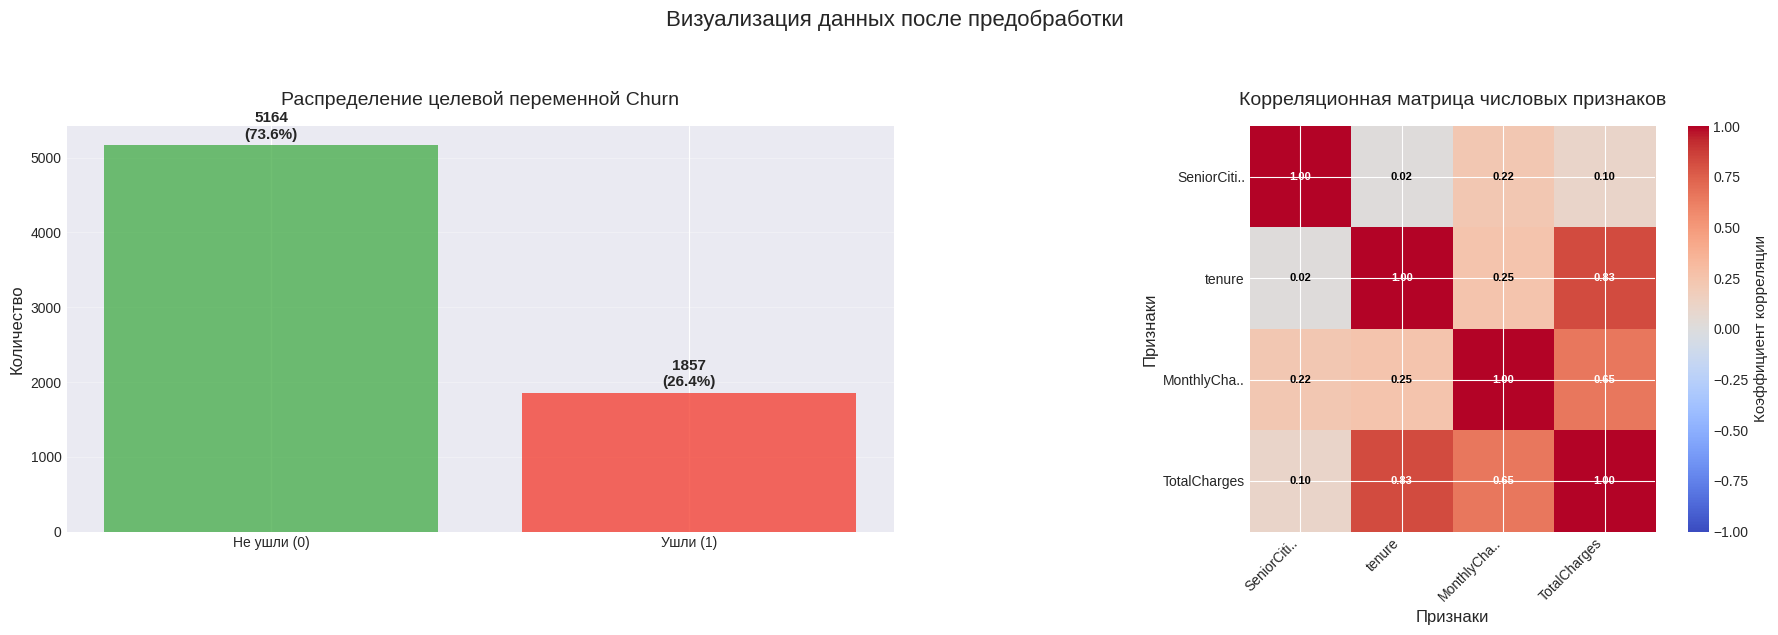

 X.shape: (7021, 19)
 y.shape: (7021,)
 Распределение классов: {0: np.int64(5164), 1: np.int64(1857)}
 Доля положительного класса: 0.264

 Размер данных после предобработки: (7021, 30)

 Количество признаков после one-hot кодирования: 30


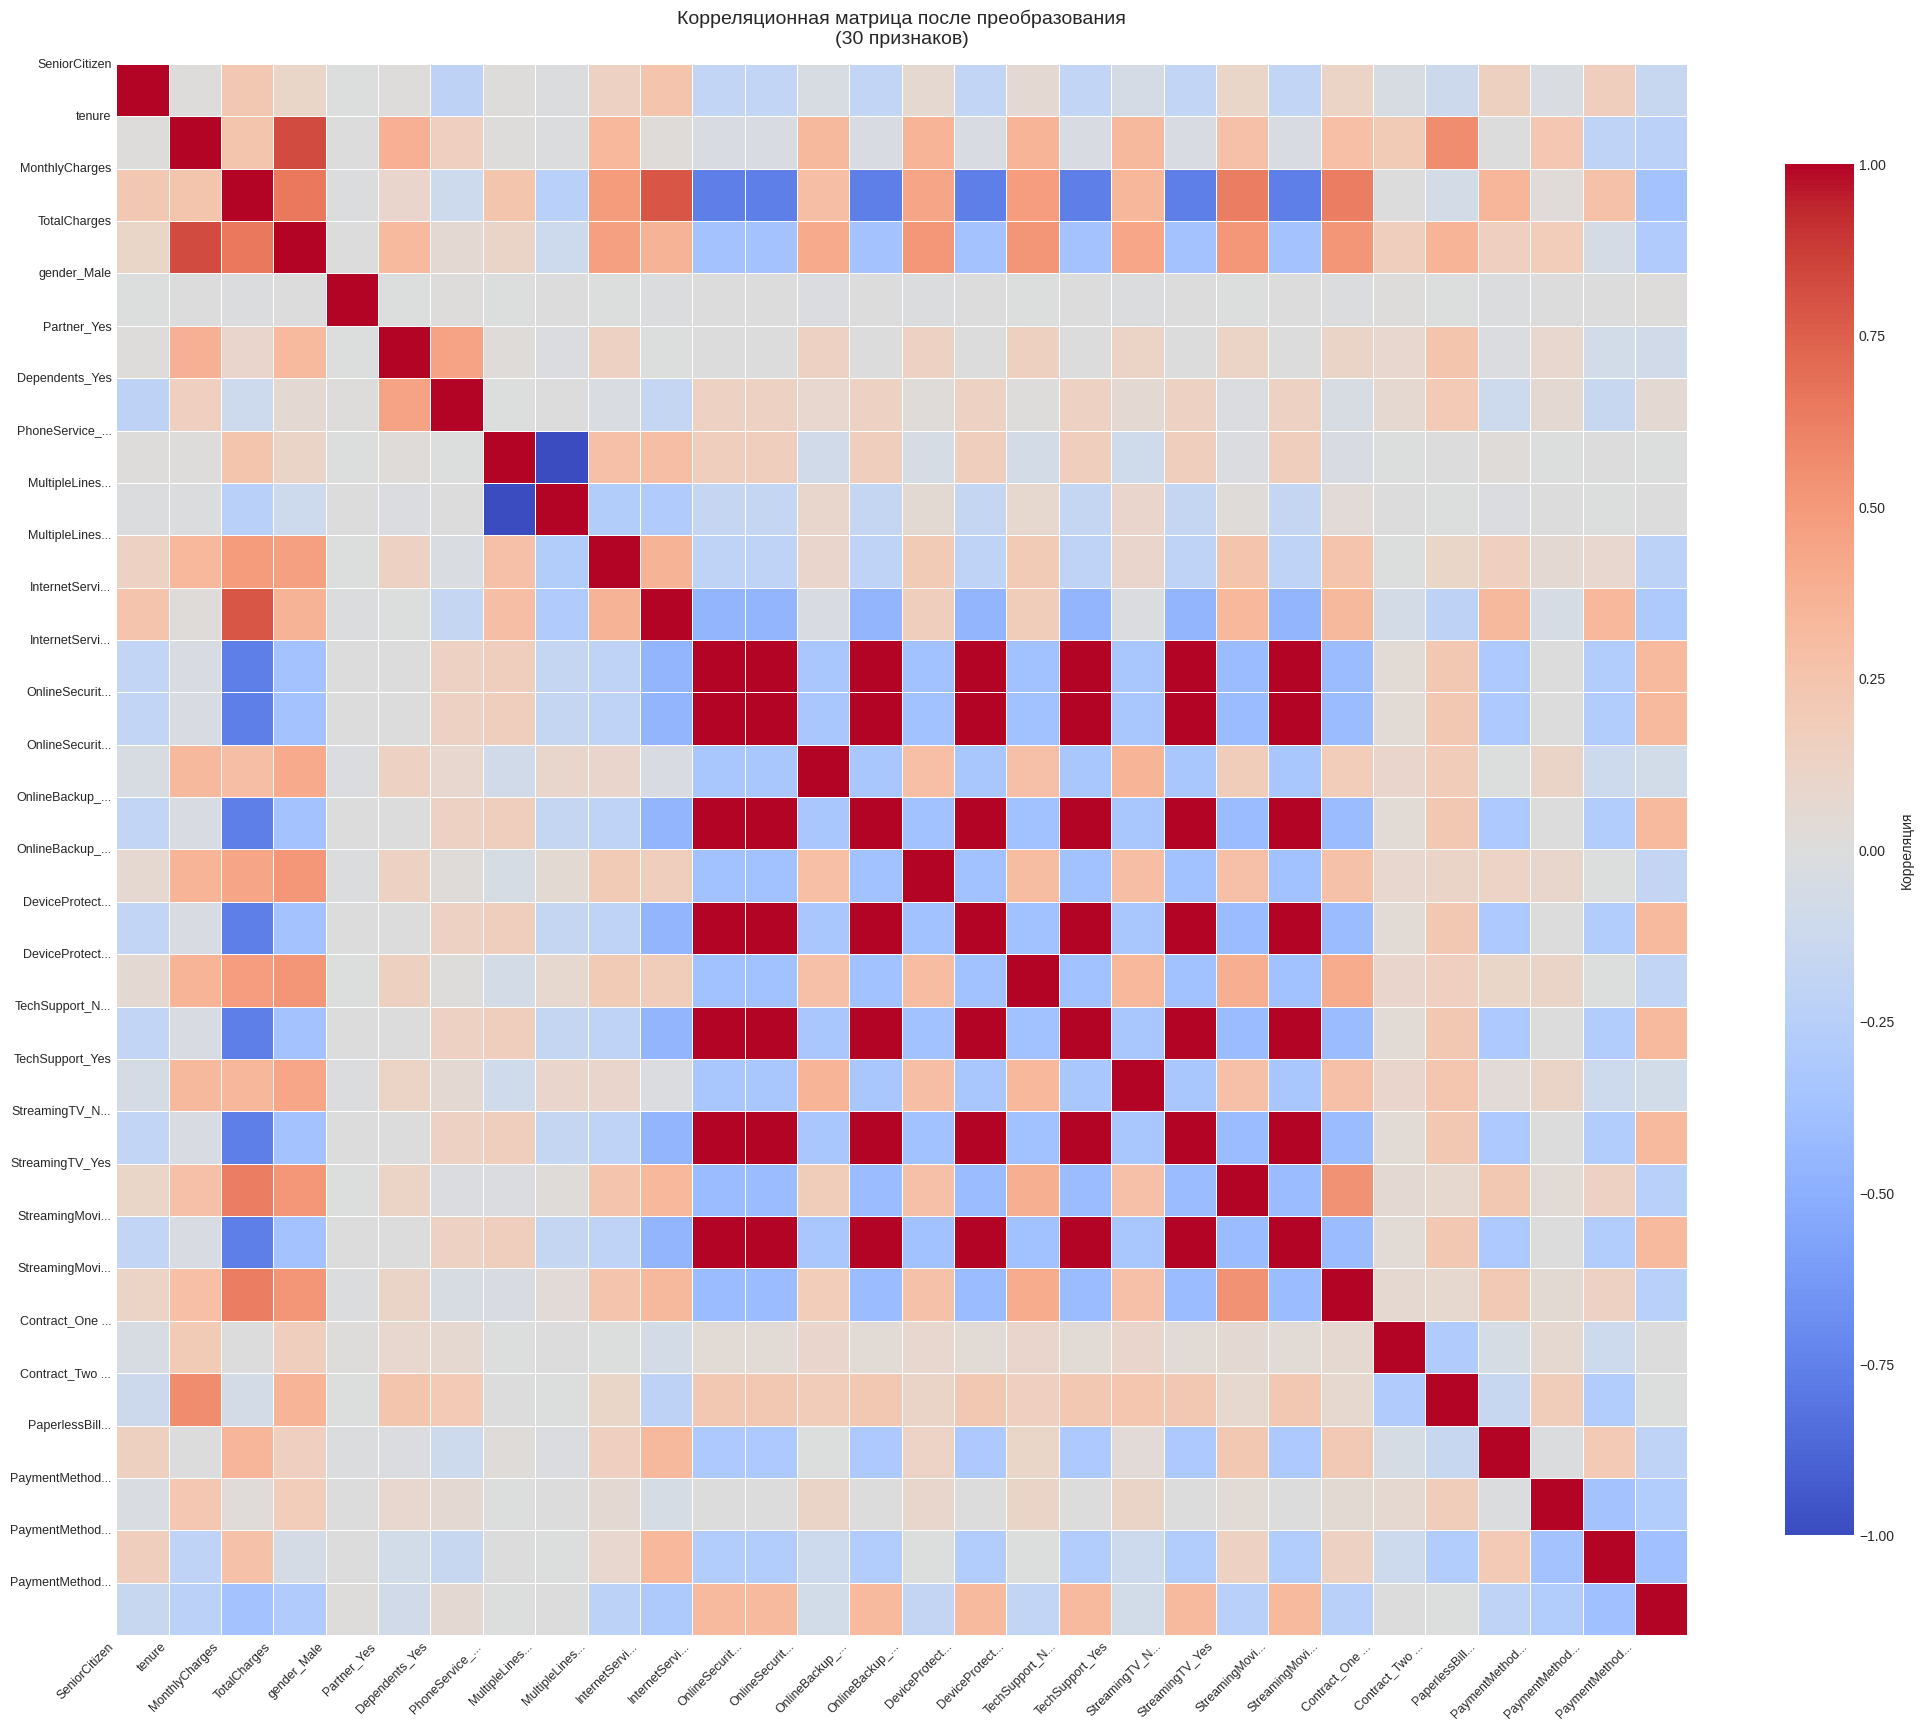


 Разделение выполнено:
 X_train: (5616, 30)
 X_test: (1405, 30)
 Y_train: (5616,) (распределение: {0: np.int64(4131), 1: np.int64(1485)})
 Y_test: (1405,) (распределение: {0: np.int64(1033), 1: np.int64(372)})
Fitting 3 folds for each of 48 candidates, totalling 144 fits

 Подбор параметров завершен
Лучшие параметры: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Лучший ROC-AUC на кросс-валидации: 0.8466

 Получившиеся метрики:


,Метрика,Значение
0,Accuracy,0.803559
1,Precision,0.661074
2,Recall,0.529570
3,F1-Score,0.588060
4,ROC-AUC,0.840298


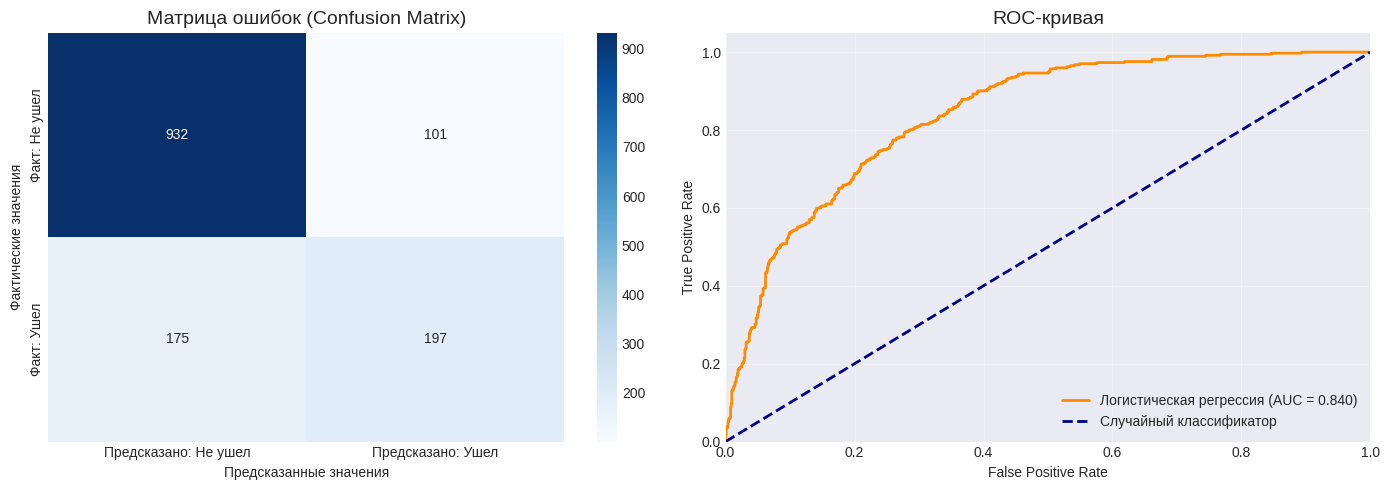

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('data/data.csv')
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nПроверка пропущенных значений:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


# Выполним более широкую предподготовку
df_clean = df.copy()

# удалим id покупателя
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop('customerID', axis=1)

# обработаем TotalCharges столбец, тк он категориальный, но имеет много значений
if 'TotalCharges' in df_clean.columns:
    print("\nОбработка TotalCharges:")
    df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(str).str.strip()
    df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(['', ' '], np.nan)
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Кодируем целевую переменную
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})
    print(" Целевая переменная 'Churn' закодирована: No→0, Yes→1")

# Разделяем признаки по типам
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")

# почистим данные от дубликатов и NaN
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['Churn'])
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} строк с пропущенным Churn")

initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} дубликатов")

print(f"\n Итоговый размер данных: {df_clean.shape}")



# Визуализируем распределение целевой переменной и выведем матрицу корреляции имеющихся до преобразования числовых признаков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

churn_counts = df_clean['Churn'].value_counts()
bars = axes[0].bar(['Не ушли (0)', 'Ушли (1)'], churn_counts.values,
                   color=['#4CAF50', '#F44336'], alpha=0.8)
axes[0].set_title('Распределение целевой переменной Churn', fontsize=14, pad=15)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    percentage = height / len(df_clean) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2., height + max(churn_counts.values)*0.01,
                 f'{int(height)}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

if len(numeric_cols) > 1:
    correlation_matrix = df_clean[numeric_cols].corr()

    im = axes[1].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title('Корреляционная матрица числовых признаков', fontsize=14, pad=15)
    axes[1].set_xlabel('Признаки', fontsize=12)
    axes[1].set_ylabel('Признаки', fontsize=12)

    axes[1].set_xticks(range(len(numeric_cols)))
    axes[1].set_yticks(range(len(numeric_cols)))

    labels = []
    for col in numeric_cols:
        if len(col) > 12:
            labels.append(col[:10] + '..')
        else:
            labels.append(col)

    axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    axes[1].set_yticklabels(labels, fontsize=10)

    cbar = plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Коэффициент корреляции', fontsize=11)

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            corr_value = correlation_matrix.iloc[i, j]
            color = 'white' if abs(corr_value) > 0.5 else 'black'
            axes[1].text(j, i, f'{corr_value:.2f}',
                         ha='center', va='center',
                         color=color, fontsize=8, fontweight='bold')

else:
    axes[1].text(0.5, 0.5, 'Недостаточно числовых признаков\nдля корреляционного анализа',
                 ha='center', va='center', fontsize=12)
    axes[1].set_title('Корреляционная матрица', fontsize=14)

plt.suptitle('Визуализация данных после предобработки', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# преобразуем категориальные признаки в числовые, посмотрим на корреляционную матрицу теперь
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

print(f" X.shape: {X.shape}")
print(f" y.shape: {y.shape}")
print(f" Распределение классов: {dict(y.value_counts())}")
print(f" Доля положительного класса: {y.mean():.3f}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
print(f"\n Размер данных после предобработки: {X_processed.shape}")

feature_names = []

feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

if len(feature_names) > 1:

    corr_matrix = X_processed_df.corr()
    features_to_show = feature_names

    plt.figure(figsize=(max(12, len(features_to_show)*0.7), max(10, len(features_to_show)*0.6)))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=False)

    plt.title(f'Корреляционная матрица после преобразования\n({len(features_to_show)} признаков)',
              fontsize=14, pad=15)

    labels = []
    for col in features_to_show:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()



# Разделим данные на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n Разделение выполнено:")
print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {dict(y_train.value_counts())})")
print(f" Y_test: {y_test.shape} (распределение: {dict(y_test.value_counts())})")


# Создадим и обучим модель логистической регрессии
logreg = LogisticRegression(random_state=42, max_iter=1000)

# определим сетку параметров для обучения модели
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# используем кросс-валидацию для подбора параметров из сетки
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

# посмотрим на подобранные параметры
print("\n Подбор параметров завершен")
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

# обучим модель с лучшими параметрами
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train, y_train)

# оценим модель стандартными метриками
y_pred = best_logreg.predict(X_test)
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy, precision, recall, f1, roc_auc]
})

print("\n Получившиеся метрики:")
display(metrics_df)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix)', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'Логистическая регрессия (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Обучим имплиментированную логистическую регрессию на улучшенном бейзлайне, посмотрим метрики

Размер данных: (7043, 21)

Первые 5 строк:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

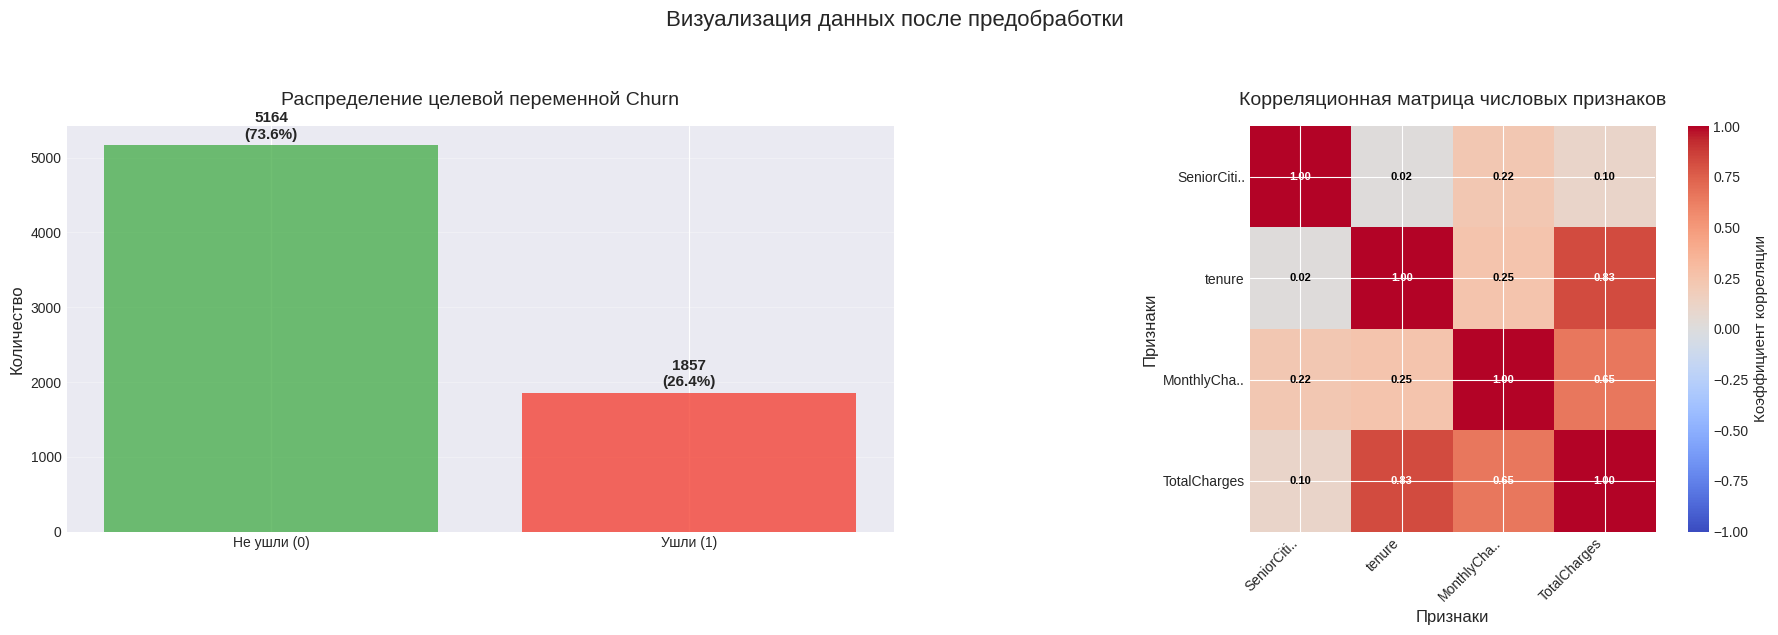

 X.shape: (7021, 19)
 y.shape: (7021,)
 Распределение классов: {0: np.int64(5164), 1: np.int64(1857)}
 Доля положительного класса: 0.264

 Размер данных после предобработки: (7021, 30)

 Количество признаков после one-hot кодирования: 30


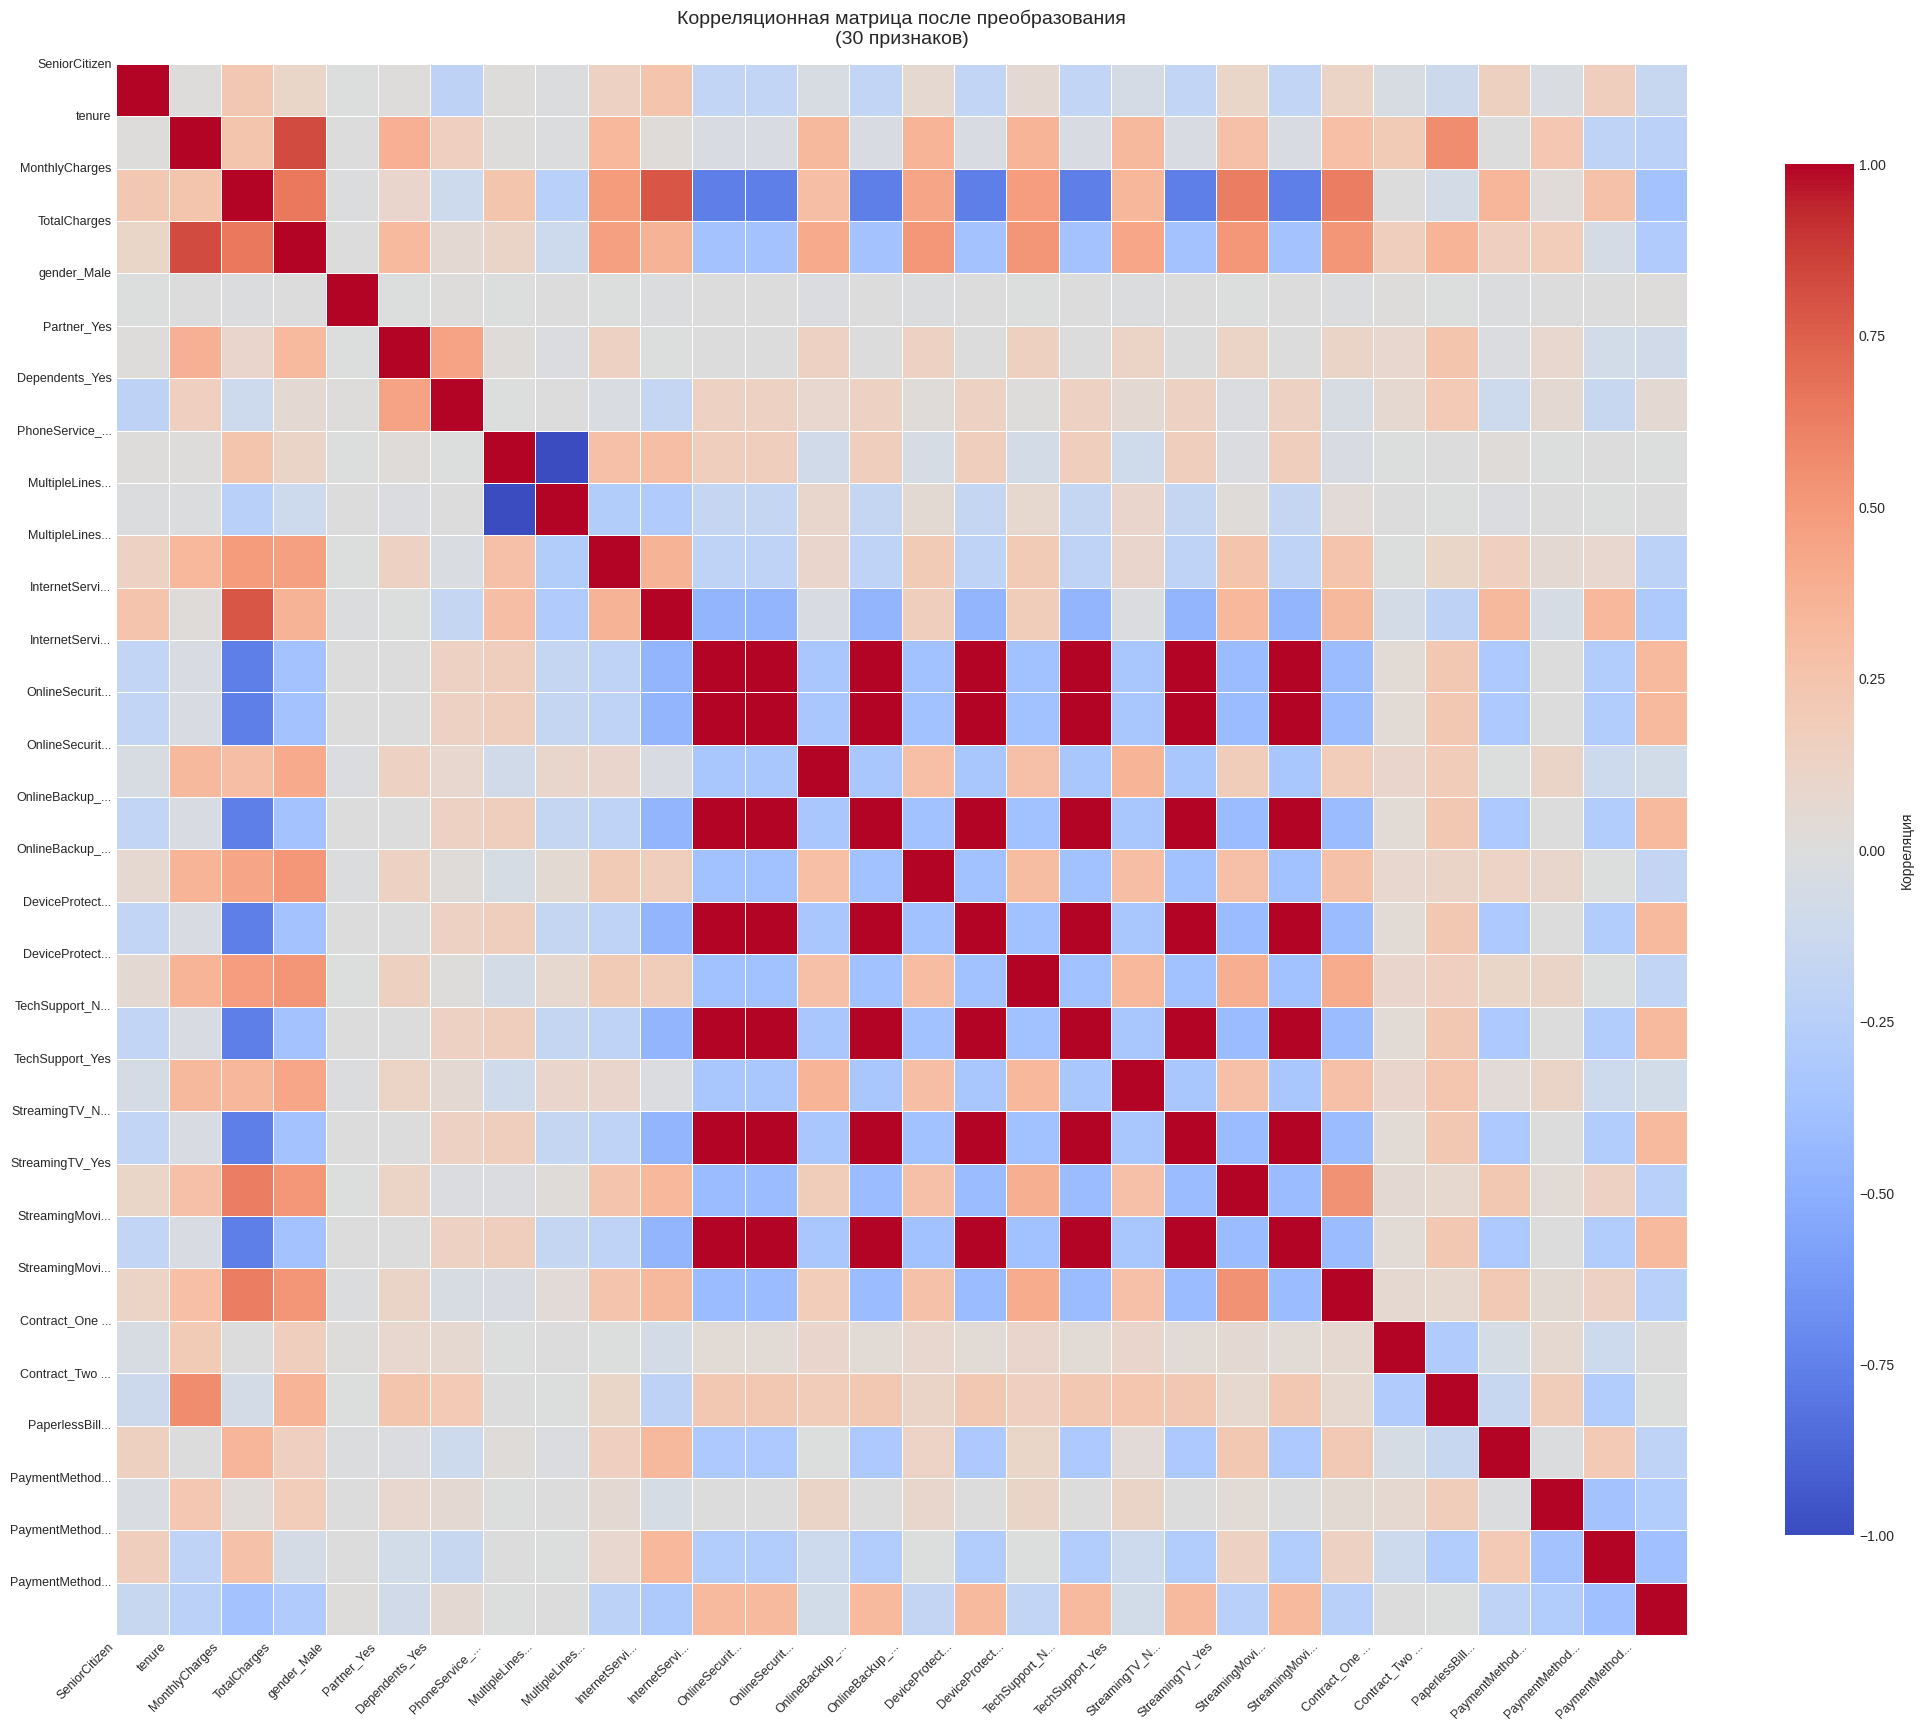


 Разделение выполнено:
 X_train: (5616, 30)
 X_test: (1405, 30)
 Y_train: (5616,) (распределение: {0: np.int64(4131), 1: np.int64(1485)})
 Y_test: (1405,) (распределение: {0: np.int64(1033), 1: np.int64(372)})

Обучение завершено
Предсказания сделаны

 Получившиеся метрики:


,Метрика,Значение
0,Accuracy,0.802847
1,Precision,0.667845
2,Recall,0.508065
3,F1-Score,0.577099
4,ROC-AUC,0.839002


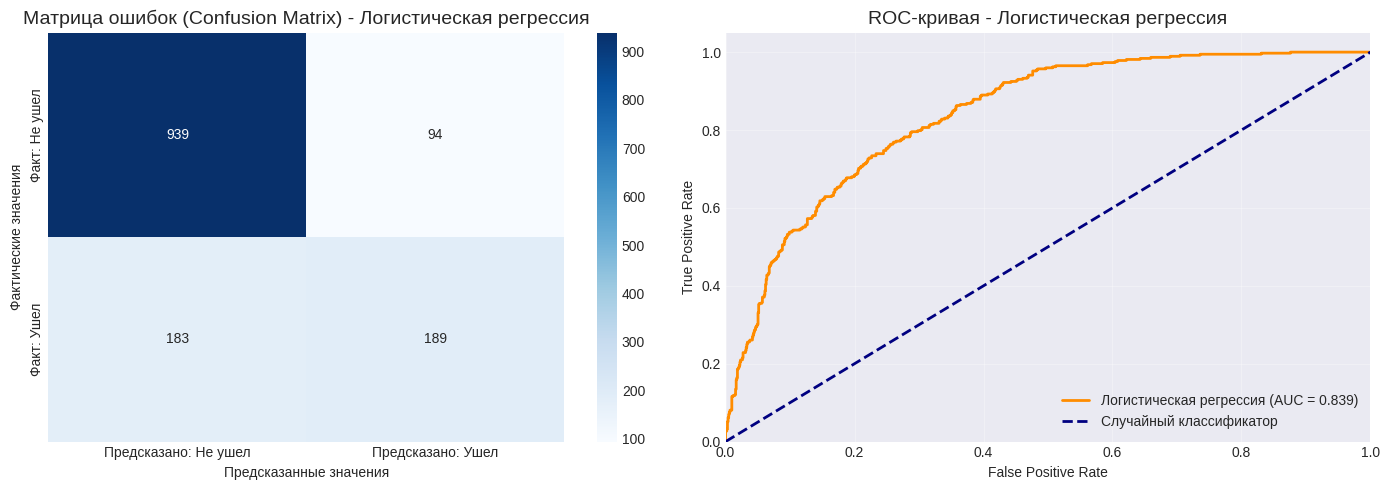

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

import numpy as np

#имплиментированная логистическая регрессия
class MyLogisticRegression:
    def __init__(self, C=1.0, penalty='l2', class_weight=None, max_iter=1000, random_state=42, learning_rate=0.1):
        self.C = C
        self.penalty = penalty
        self.class_weight = class_weight
        self.max_iter = max_iter
        self.random_state = random_state
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.classes_ = None
        self.class_weights_dict = None

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_class_weights(self, y):
        if self.class_weight == 'balanced':
            classes, counts = np.unique(y, return_counts=True)
            n_classes = len(classes)
            n_samples = len(y)
            weights = {}
            for i, cls in enumerate(classes):
                weights[cls] = n_samples / (n_classes * counts[i])
            return weights
        return None

    def _get_sample_weights(self, y):
        if self.class_weights_dict:
            sample_weights = np.array([self.class_weights_dict[label] for label in y])
            return sample_weights
        return np.ones(len(y))

    def _compute_gradient(self, X, y_true, y_pred, sample_weights):
        n_samples = X.shape[0]
        error = y_pred - y_true

        dw = np.dot(X.T, error * sample_weights) / n_samples
        db = np.sum(error * sample_weights) / n_samples

        if self.penalty == 'l2':
            dw += (1 / (self.C * n_samples)) * self.weights
        elif self.penalty == 'l1':
            dw += (1 / (self.C * n_samples)) * np.sign(self.weights)

        return dw, db

    def _compute_loss(self, y_true, y_pred, sample_weights):
        n_samples = len(y_true)
        log_loss = -np.sum(sample_weights * (y_true * np.log(y_pred + 1e-10) +
                                            (1 - y_true) * np.log(1 - y_pred + 1e-10))) / np.sum(sample_weights)

        if self.penalty == 'l2' and self.C > 0:
            reg_term = (1 / (2 * self.C * n_samples)) * np.sum(self.weights**2)
        elif self.penalty == 'l1' and self.C > 0:
            reg_term = (1 / (self.C * n_samples)) * np.sum(np.abs(self.weights))
        else:
            reg_term = 0

        return log_loss + reg_term

    def fit(self, X, y):
        np.random.seed(self.random_state)

        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)

        self.class_weights_dict = self._compute_class_weights(y)

        self.weights = np.zeros(n_features)
        self.bias = 0.0

        sample_weights = self._get_sample_weights(y)

        sample_weights = sample_weights / np.mean(sample_weights)

        losses = []

        for iteration in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw, db = self._compute_gradient(X, y, y_predicted, sample_weights)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if iteration % 100 == 0:
                loss = self._compute_loss(y, y_predicted, sample_weights)
                losses.append(loss)

        return self

    def predict_proba(self, X):
        X = np.array(X, dtype=np.float64)
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_model)
        return np.column_stack([1 - probabilities, probabilities])

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities >= threshold).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


# Загрузка данных
df = pd.read_csv('data/data.csv')
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nПроверка пропущенных значений:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


# Выполним более широкую предподготовку
df_clean = df.copy()

# удалим id покупателя
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop('customerID', axis=1)

# обработаем TotalCharges столбец, тк он категориальный, но имеет много значений
if 'TotalCharges' in df_clean.columns:
    print("\nОбработка TotalCharges:")
    df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(str).str.strip()
    df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(['', ' '], np.nan)
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Кодируем целевую переменную
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})
    print(" Целевая переменная 'Churn' закодирована: No→0, Yes→1")

# Разделяем признаки по типам
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")

# почистим данные от дубликатов и NaN
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['Churn'])
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} строк с пропущенным Churn")

initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} дубликатов")

print(f"\n Итоговый размер данных: {df_clean.shape}")



# Визуализируем распределение целевой переменной и выведем матрицу корреляции имеющихся до преобразования числовых признаков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

churn_counts = df_clean['Churn'].value_counts()
bars = axes[0].bar(['Не ушли (0)', 'Ушли (1)'], churn_counts.values,
                   color=['#4CAF50', '#F44336'], alpha=0.8)
axes[0].set_title('Распределение целевой переменной Churn', fontsize=14, pad=15)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    percentage = height / len(df_clean) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2., height + max(churn_counts.values)*0.01,
                 f'{int(height)}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

if len(numeric_cols) > 1:
    correlation_matrix = df_clean[numeric_cols].corr()

    im = axes[1].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title('Корреляционная матрица числовых признаков', fontsize=14, pad=15)
    axes[1].set_xlabel('Признаки', fontsize=12)
    axes[1].set_ylabel('Признаки', fontsize=12)

    axes[1].set_xticks(range(len(numeric_cols)))
    axes[1].set_yticks(range(len(numeric_cols)))

    labels = []
    for col in numeric_cols:
        if len(col) > 12:
            labels.append(col[:10] + '..')
        else:
            labels.append(col)

    axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    axes[1].set_yticklabels(labels, fontsize=10)

    cbar = plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Коэффициент корреляции', fontsize=11)

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            corr_value = correlation_matrix.iloc[i, j]
            color = 'white' if abs(corr_value) > 0.5 else 'black'
            axes[1].text(j, i, f'{corr_value:.2f}',
                         ha='center', va='center',
                         color=color, fontsize=8, fontweight='bold')

else:
    axes[1].text(0.5, 0.5, 'Недостаточно числовых признаков\nдля корреляционного анализа',
                 ha='center', va='center', fontsize=12)
    axes[1].set_title('Корреляционная матрица', fontsize=14)

plt.suptitle('Визуализация данных после предобработки', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# преобразуем категориальные признаки в числовые, посмотрим на корреляционную матрицу теперь
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

print(f" X.shape: {X.shape}")
print(f" y.shape: {y.shape}")
print(f" Распределение классов: {dict(y.value_counts())}")
print(f" Доля положительного класса: {y.mean():.3f}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
print(f"\n Размер данных после предобработки: {X_processed.shape}")

feature_names = []

feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

if len(feature_names) > 1:

    corr_matrix = X_processed_df.corr()
    features_to_show = feature_names

    plt.figure(figsize=(max(12, len(features_to_show)*0.7), max(10, len(features_to_show)*0.6)))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=False)

    plt.title(f'Корреляционная матрица после преобразования\n({len(features_to_show)} признаков)',
              fontsize=14, pad=15)

    labels = []
    for col in features_to_show:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()



# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n Разделение выполнено:")
print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {dict(y_train.value_counts())})")
print(f" Y_test: {y_test.shape} (распределение: {dict(y_test.value_counts())})")


# возьмем самые оптимальные параметры модели, обучим ее и выполним предсказания
my_logreg = MyLogisticRegression(C=10, penalty='l1', learning_rate=0.05, max_iter=2000)
my_logreg.fit(X_train, y_train)
print("\nОбучение завершено")

y_pred = my_logreg.predict(X_test)
y_pred_proba = my_logreg.predict_proba(X_test)[:, 1]
print("Предсказания сделаны")

# Оцениваем метрики
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba)

metrics_df_logreg = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg]
})

print("\n Получившиеся метрики:")
display(metrics_df_logreg)

# Матрица ошибок
cm_logreg = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix) - Логистическая регрессия', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Логистическая регрессия (AUC = {roc_auc_logreg:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая - Логистическая регрессия', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Существенное отличие между моделью логистической регрессии из sklearn и имплиментированной моделью проявляется лишь на бейзлайне. Дело в том, что модель из sklearn имеет куча технологий для оптимизации предсказаний, в отличие от моей более простой версии. Отсюда и такая в метриках на бейзлайне**





**Теперь решаем задачу регрессии с датасетами data/linear/train_energy_data.csv и data/linear/test_energy_data.csv, то есть сразу имеем разделение на тестовую и обучающие выборки**

Обучим модель линейной регрессии, используя безлайны без сильной обработки выборок и оценим точности предсказания с помощью основных метрик.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

# Загрузим данные (датасет для регрессии сразу разделен на тестовую и обучающие выборки)
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print("\nПервые 5 строк обучающей выборки:")
display(train_df.head())
print("\nПервые 5 строк тестовой выборки:")
display(test_df.head())

print("\nИнформация о данных (обучающая выборка):")
train_df.info()

# проверим на пропущенные значения
print("Проверка на пропущенные значения:")
print("Обучающая выборка:")
print(train_df.isnull().sum())
print("\nТестовая выборка:")
print(test_df.isnull().sum())

train_clean = train_df.copy()
test_clean = test_df.copy()

# Удалим категориальные признаки
categorical_cols = ['Building Type', 'Day of Week']
train_clean = train_clean.drop(categorical_cols, axis=1, errors='ignore')
test_clean = test_clean.drop(categorical_cols, axis=1, errors='ignore')

print(f" Обучающая выборка после обработки: {train_clean.shape}")
print(f" Тестовая выборка после обработки: {test_clean.shape}")

# Разделяем на признаки и целевую переменную
X_train = train_clean.drop('Energy Consumption', axis=1)
y_train = train_clean['Energy Consumption']

X_test = test_clean.drop('Energy Consumption', axis=1)
y_test = test_clean['Energy Consumption']

print(f" X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")


# Создаем и обучаем модель
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print("\nМодель обучена")

# Делаем предсказания
y_pred_train = linear_regressor.predict(X_train)
y_pred_test = linear_regressor.predict(X_test)

print("Предсказания сделаны")

def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



Первые 5 строк тестовой выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59



Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
Проверка на пропущенные значения:
Обучающая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Тестовая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appli

,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,339.857004,374.231081
1,MSE,165639.573145,184783.489834
2,RMSE,406.988419,429.864502
3,R²,0.809654,0.730724
4,MAPE (%),8.612804,9.501663


Имплиментируем линейный регрессор и обучим его на бейзлайне


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#имплиментированный регрессор
class LinearRegressorModel:
    def __init__(self, fit_intercept=True, method='normal'):
        self.fit_intercept = fit_intercept
        self.method = method
        self.coef_ = None
        self.intercept_ = None
        self.n_features_in_ = None

    def _add_intercept(self, X):
        if self.fit_intercept:
            return np.column_stack([np.ones(X.shape[0]), X])
        return X

    def _normal_equations(self, X, y):
        try:
            theta = np.linalg.pinv(X.T @ X) @ X.T @ y
        except np.linalg.LinAlgError:
            U, s, Vt = np.linalg.svd(X, full_matrices=False)
            s_inv = np.diag(1.0 / s)
            theta = Vt.T @ s_inv @ U.T @ y
        return theta

    def _gradient_descent(self, X, y, learning_rate=0.01, n_iter=1000):
        n_samples, n_features = X.shape
        theta = np.zeros(n_features)

        self.loss_history_ = []

        for i in range(n_iter):
            y_pred = X @ theta

            error = y_pred - y
            loss = np.mean(error ** 2)
            self.loss_history_.append(loss)

            gradient = (2 / n_samples) * X.T @ error

            theta -= learning_rate * gradient

            if i > 0 and abs(self.loss_history_[-2] - loss) < 1e-6:
                break

        return theta

    def fit(self, X, y, learning_rate=0.01, n_iter=1000):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        self.n_features_in_ = X.shape[1]

        X_with_intercept = self._add_intercept(X)

        if self.method == 'normal':
            theta = self._normal_equations(X_with_intercept, y)
        elif self.method == 'gradient':
            theta = self._gradient_descent(X_with_intercept, y, learning_rate, n_iter)
        else:
            raise ValueError(f"Метод '{self.method}' не поддерживается.")

        if self.fit_intercept:
            self.intercept_ = theta[0]
            self.coef_ = theta[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = theta

        return self

    def predict(self, X):
        if self.coef_ is None:
            raise ValueError("Модель не обучена. Сначала вызовите fit().")

        X = np.array(X, dtype=np.float64)

        return X @ self.coef_ + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        y = np.array(y, dtype=np.float64)

        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)

        if ss_tot == 0:
            return 0.0

        return 1 - (ss_res / ss_tot)

    def get_params(self, deep=True):
        return {
            'fit_intercept': self.fit_intercept,
            'method': self.method
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


# Загрузим данные (датасет для регрессии сразу разделен на тестовую и обучающие выборки)
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print("\nПервые 5 строк обучающей выборки:")
display(train_df.head())
print("\nПервые 5 строк тестовой выборки:")
display(test_df.head())

print("\nИнформация о данных (обучающая выборка):")
train_df.info()

# проверим на пропущенные значения
print("Проверка на пропущенные значения:")
print("Обучающая выборка:")
print(train_df.isnull().sum())
print("\nТестовая выборка:")
print(test_df.isnull().sum())

train_clean = train_df.copy()
test_clean = test_df.copy()

# Удалим категориальные признаки
categorical_cols = ['Building Type', 'Day of Week']
train_clean = train_clean.drop(categorical_cols, axis=1, errors='ignore')
test_clean = test_clean.drop(categorical_cols, axis=1, errors='ignore')

print(f" Обучающая выборка после обработки: {train_clean.shape}")
print(f" Тестовая выборка после обработки: {test_clean.shape}")

# Разделяем на признаки и целевую переменную
X_train = train_clean.drop('Energy Consumption', axis=1)
y_train = train_clean['Energy Consumption']

X_test = test_clean.drop('Energy Consumption', axis=1)
y_test = test_clean['Energy Consumption']

print(f" X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")


# создаем и обучаем моделб
linear_regressor = LinearRegressorModel(fit_intercept=True, method='normal')
linear_regressor.fit(X_train, y_train)

print("\nМодель обучена")

# Делаем предсказания
y_pred_train = linear_regressor.predict(X_train)
y_pred_test = linear_regressor.predict(X_test)

print("Предсказания сделаны")

def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')


metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)


Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



Первые 5 строк тестовой выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59



Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
Проверка на пропущенные значения:
Обучающая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Тестовая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appli

,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,339.857004,374.231081
1,MSE,165639.573145,184783.489831
2,RMSE,406.988419,429.864502
3,R²,0.809654,0.730724
4,MAPE (%),8.612804,9.501663


Теперь улучшим бейзлайн для линейной регрессии, обучим заново модель на получившемся датасете. Применим кодирование категориальных признаков, чтобы получились правильные предсказания

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

 Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



 Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB

 Проверка пропущенных значений:
Обучающая выборка:
Series([], dtype: int64)

Тестовая выборка:
Series([], dtype: int64)

 Категориальные признаки (2): ['Building Type', 'Day of Week']

 Числовые признаки (4): ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']

 X_train: (1000, 6)
 Y_train: (1000,)
 X_tes

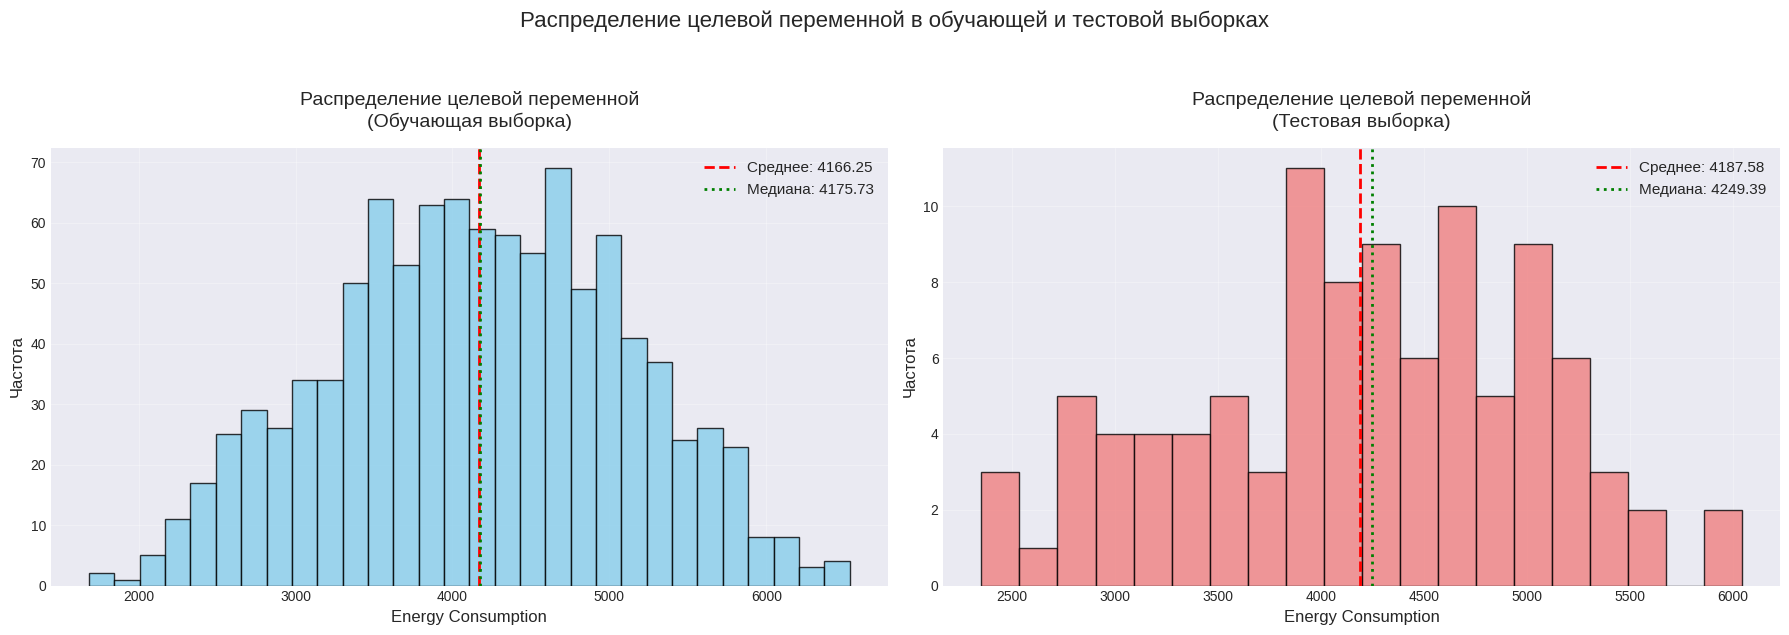

 Размер обучающих данных после предобработки: (1000, 7)
 Размер тестовых данных после предобработки: (100, 7)

 Количество признаков после one-hot кодирования: 7


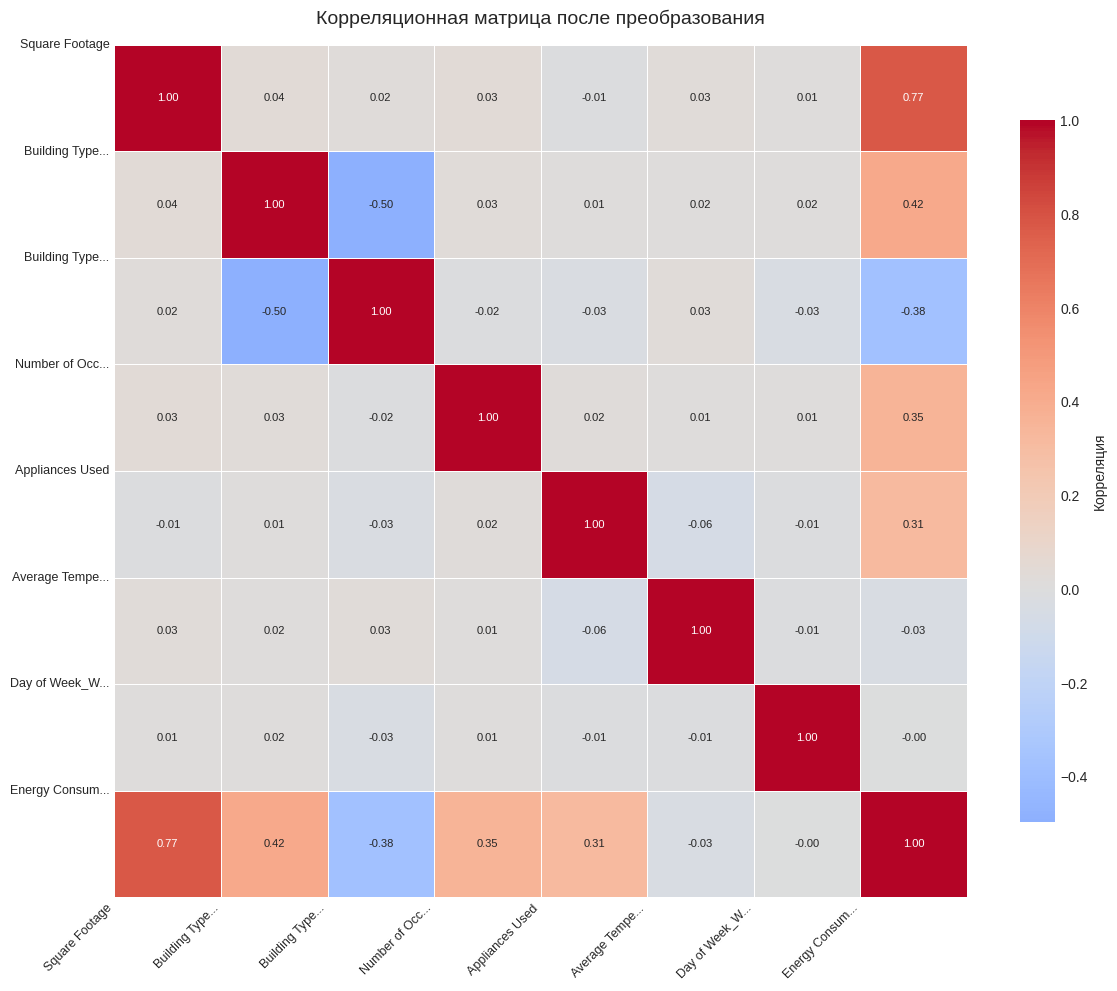


Модель обучена
Предсказания сделаны

МЕТРИКИ КАЧЕСТВА МОДЕЛИ:


,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,0.011573,0.012162
1,MSE,0.000186,0.000202
2,RMSE,0.013650,0.014197
3,R²,1.000000,1.000000
4,MAPE (%),0.000296,0.000305


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


# Загрузка данных
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\n Первые 5 строк обучающей выборки:")
display(train_df.head())

print("\n Информация о данных (обучающая выборка):")
train_df.info()

print("\n Проверка пропущенных значений:")
missing_data_train = train_df.isnull().sum()
missing_data_test = test_df.isnull().sum()
print("Обучающая выборка:")
print(missing_data_train[missing_data_train > 0])
print("\nТестовая выборка:")
print(missing_data_test[missing_data_test > 0])



# преобразуем категориальные признаки в числовые
train_clean = train_df.copy()
test_clean = test_df.copy()

categorical_cols = train_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()

target_col = 'Energy Consumption'
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train = train_clean.drop(target_col, axis=1)
y_train = train_clean[target_col]

X_test = test_clean.drop(target_col, axis=1)
y_test = test_clean[target_col]

print(f"\n X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")



# посмотрим на распределение целевой переменной в обучающей и тестовых выборках
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


target_values_train = train_clean[target_col]
axes[0].hist(target_values_train, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Распределение целевой переменной\n(Обучающая выборка)', fontsize=14, pad=15)
axes[0].set_xlabel('Energy Consumption', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].grid(alpha=0.3)
mean_val_train = target_values_train.mean()
median_val_train = target_values_train.median()
axes[0].axvline(mean_val_train, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_train:.2f}')
axes[0].axvline(median_val_train, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_train:.2f}')
axes[0].legend(fontsize=11)


target_values_test = test_clean[target_col]
axes[1].hist(target_values_test, bins=20, color='lightcoral', edgecolor='black', alpha=0.8)
axes[1].set_title('Распределение целевой переменной\n(Тестовая выборка)', fontsize=14, pad=15)
axes[1].set_xlabel('Energy Consumption', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].grid(alpha=0.3)
mean_val_test = target_values_test.mean()
median_val_test = target_values_test.median()
axes[1].axvline(mean_val_test, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_test:.2f}')
axes[1].axvline(median_val_test, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_test:.2f}')
axes[1].legend(fontsize=11)

plt.suptitle('Распределение целевой переменной в обучающей и тестовой выборках',
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



# применим преобразование, посмотрим получившуюся матрицу корреляции
X_train_processed = preprocessor.fit_transform(X_train)
print(f" Размер обучающих данных после предобработки: {X_train_processed.shape}")
X_test_processed = preprocessor.transform(X_test)
print(f" Размер тестовых данных после предобработки: {X_test_processed.shape}")

feature_names = []
feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)

if len(feature_names) > 1:
    X_train_processed_df[target_col] = y_train.values

    correlations_with_target = X_train_processed_df.corr()[target_col].drop(target_col)
    top_features = correlations_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

    corr_matrix = X_train_processed_df[top_features + [target_col]].corr()

    plt.figure(figsize=(12, 10))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=True, fmt='.2f', annot_kws={"size": 8})

    plt.title('Корреляционная матрица после преобразования',
              fontsize=14, pad=15)

    # Форматируем подписи
    labels = []
    for col in top_features + [target_col]:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()




# Создадим и обучим модель линейной регрессии (кросс валидация бессмысленна)
linear_reg = LinearRegression()

# # определим сетку параметров для кросс валидации
# param_grid = {
#     'fit_intercept': [True, False],
#     'copy_X': [True, False],
#     'positive': [False, True]
# }

# linear_grid = GridSearchCV(
#     estimator=linear_reg,
#     param_grid=param_grid,
#     scoring='r2',
#     cv=3,
#     n_jobs=-1,
#     verbose=1
# )

# linear_grid.fit(X_train_processed, y_train)

# print("\n Подбор параметров завершен")
# print(f"Лучшие параметры для модели: {linear_grid.best_params_}")

# best_linear = linear_grid.best_estimator_
linear_reg.fit(X_train_processed, y_train)
print("\nМодель обучена")

y_pred_train = linear_reg.predict(X_train_processed)
y_pred_test = linear_reg.predict(X_test_processed)
print("Предсказания сделаны")

# Вычисляем метрики
def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)

На подготовленном, улучшенном бейзлайне обучим имплиментированную линейную регрессию

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

 Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



 Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB

 Проверка пропущенных значений:
Обучающая выборка:
Series([], dtype: int64)

Тестовая выборка:
Series([], dtype: int64)

 Категориальные признаки (2): ['Building Type', 'Day of Week']

 Числовые признаки (4): ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']

 X_train: (1000, 6)
 Y_train: (1000,)
 X_tes

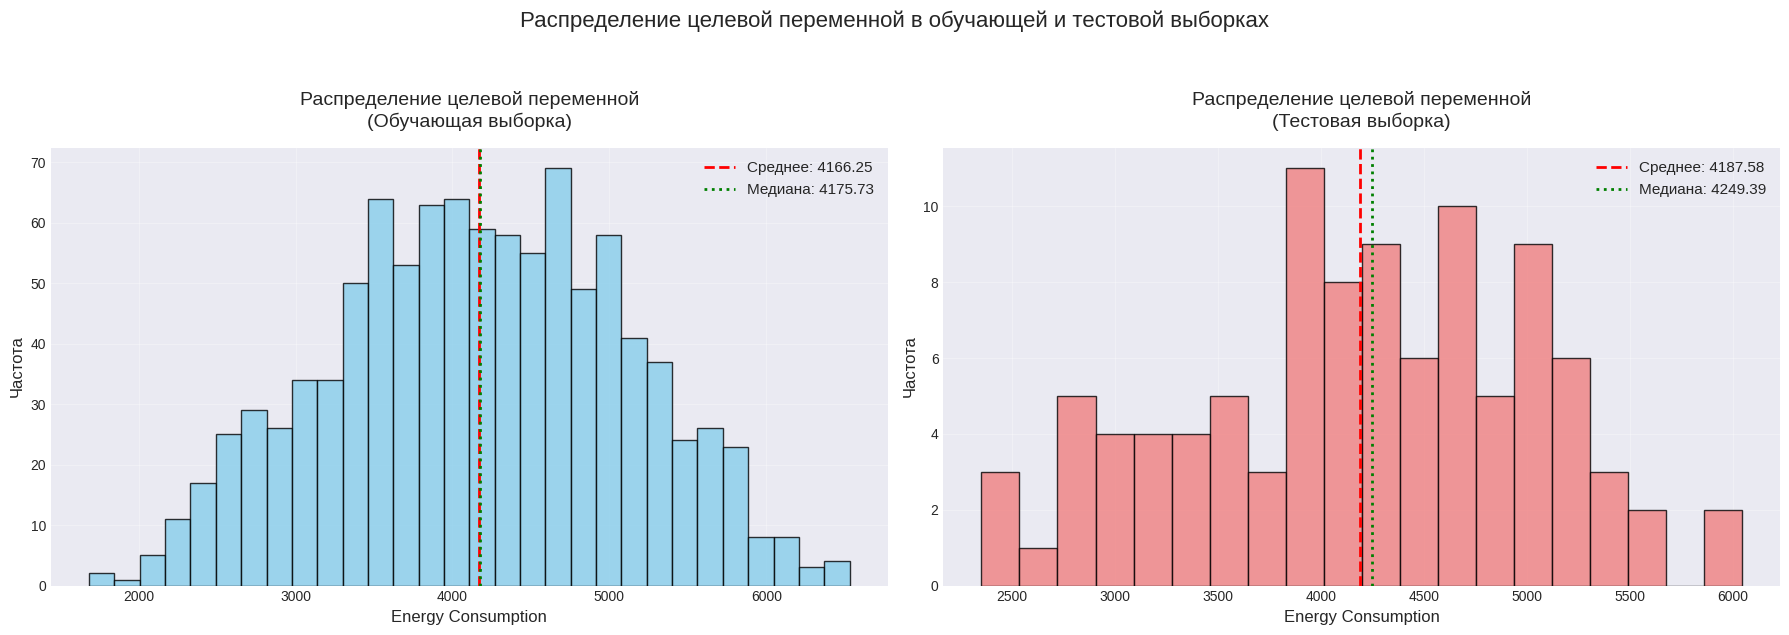

 Размер обучающих данных после предобработки: (1000, 7)
 Размер тестовых данных после предобработки: (100, 7)

 Количество признаков после one-hot кодирования: 7


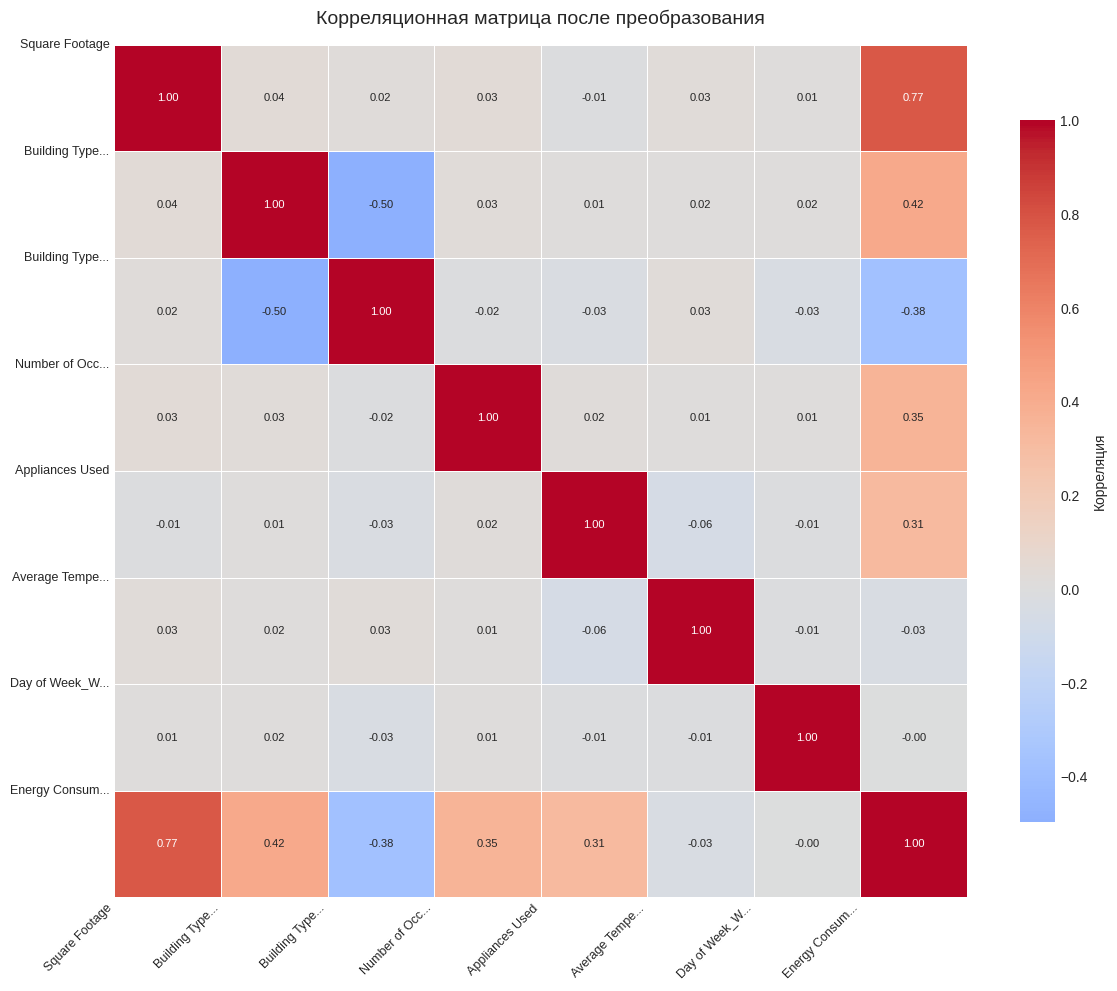


Модель обучена
Предсказания сделаны

МЕТРИКИ КАЧЕСТВА МОДЕЛИ:


,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,0.011573,0.012162
1,MSE,0.000186,0.000202
2,RMSE,0.013650,0.014197
3,R²,1.000000,1.000000
4,MAPE (%),0.000296,0.000305


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

#имплиментированный регрессор
class LinearRegressorModel:
    def __init__(self, fit_intercept=True, method='normal'):
        self.fit_intercept = fit_intercept
        self.method = method
        self.coef_ = None
        self.intercept_ = None
        self.n_features_in_ = None

    def _add_intercept(self, X):
        if self.fit_intercept:
            return np.column_stack([np.ones(X.shape[0]), X])
        return X

    def _normal_equations(self, X, y):
        try:
            theta = np.linalg.pinv(X.T @ X) @ X.T @ y
        except np.linalg.LinAlgError:
            U, s, Vt = np.linalg.svd(X, full_matrices=False)
            s_inv = np.diag(1.0 / s)
            theta = Vt.T @ s_inv @ U.T @ y
        return theta

    def _gradient_descent(self, X, y, learning_rate=0.01, n_iter=1000):
        n_samples, n_features = X.shape
        theta = np.zeros(n_features)

        self.loss_history_ = []

        for i in range(n_iter):
            y_pred = X @ theta

            error = y_pred - y
            loss = np.mean(error ** 2)
            self.loss_history_.append(loss)

            gradient = (2 / n_samples) * X.T @ error

            theta -= learning_rate * gradient

            if i > 0 and abs(self.loss_history_[-2] - loss) < 1e-6:
                break

        return theta

    def fit(self, X, y, learning_rate=0.01, n_iter=1000):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        self.n_features_in_ = X.shape[1]

        X_with_intercept = self._add_intercept(X)

        if self.method == 'normal':
            theta = self._normal_equations(X_with_intercept, y)
        elif self.method == 'gradient':
            theta = self._gradient_descent(X_with_intercept, y, learning_rate, n_iter)
        else:
            raise ValueError(f"Метод '{self.method}' не поддерживается.")

        if self.fit_intercept:
            self.intercept_ = theta[0]
            self.coef_ = theta[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = theta

        return self

    def predict(self, X):
        if self.coef_ is None:
            raise ValueError("Модель не обучена. Сначала вызовите fit().")

        X = np.array(X, dtype=np.float64)

        return X @ self.coef_ + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        y = np.array(y, dtype=np.float64)

        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)

        if ss_tot == 0:
            return 0.0

        return 1 - (ss_res / ss_tot)

    def get_params(self, deep=True):
        return {
            'fit_intercept': self.fit_intercept,
            'method': self.method
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self



# Загрузка данных
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\n Первые 5 строк обучающей выборки:")
display(train_df.head())

print("\n Информация о данных (обучающая выборка):")
train_df.info()

print("\n Проверка пропущенных значений:")
missing_data_train = train_df.isnull().sum()
missing_data_test = test_df.isnull().sum()
print("Обучающая выборка:")
print(missing_data_train[missing_data_train > 0])
print("\nТестовая выборка:")
print(missing_data_test[missing_data_test > 0])



# преобразуем категориальные признаки в числовые
train_clean = train_df.copy()
test_clean = test_df.copy()

categorical_cols = train_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()

target_col = 'Energy Consumption'
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train = train_clean.drop(target_col, axis=1)
y_train = train_clean[target_col]

X_test = test_clean.drop(target_col, axis=1)
y_test = test_clean[target_col]

print(f"\n X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")



# посмотрим на распределение целевой переменной в обучающей и тестовых выборках
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


target_values_train = train_clean[target_col]
axes[0].hist(target_values_train, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Распределение целевой переменной\n(Обучающая выборка)', fontsize=14, pad=15)
axes[0].set_xlabel('Energy Consumption', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].grid(alpha=0.3)
mean_val_train = target_values_train.mean()
median_val_train = target_values_train.median()
axes[0].axvline(mean_val_train, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_train:.2f}')
axes[0].axvline(median_val_train, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_train:.2f}')
axes[0].legend(fontsize=11)


target_values_test = test_clean[target_col]
axes[1].hist(target_values_test, bins=20, color='lightcoral', edgecolor='black', alpha=0.8)
axes[1].set_title('Распределение целевой переменной\n(Тестовая выборка)', fontsize=14, pad=15)
axes[1].set_xlabel('Energy Consumption', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].grid(alpha=0.3)
mean_val_test = target_values_test.mean()
median_val_test = target_values_test.median()
axes[1].axvline(mean_val_test, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_test:.2f}')
axes[1].axvline(median_val_test, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_test:.2f}')
axes[1].legend(fontsize=11)

plt.suptitle('Распределение целевой переменной в обучающей и тестовой выборках',
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



# применим преобразование, посмотрим получившуюся матрицу корреляции
X_train_processed = preprocessor.fit_transform(X_train)
print(f" Размер обучающих данных после предобработки: {X_train_processed.shape}")
X_test_processed = preprocessor.transform(X_test)
print(f" Размер тестовых данных после предобработки: {X_test_processed.shape}")

feature_names = []
feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)

if len(feature_names) > 1:
    X_train_processed_df[target_col] = y_train.values

    correlations_with_target = X_train_processed_df.corr()[target_col].drop(target_col)
    top_features = correlations_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

    corr_matrix = X_train_processed_df[top_features + [target_col]].corr()

    plt.figure(figsize=(12, 10))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=True, fmt='.2f', annot_kws={"size": 8})

    plt.title('Корреляционная матрица после преобразования',
              fontsize=14, pad=15)

    # Форматируем подписи
    labels = []
    for col in top_features + [target_col]:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()



# Создадим и обучим модель имплиментированную модель регрессии (подбор гиперпараметров не влияет на точность предсказаний из-за особенностей датасета)
my_linear_regressor = LinearRegressorModel()

my_linear_regressor.fit(X_train_processed, y_train)
print("\nМодель обучена")

y_pred_train = my_linear_regressor.predict(X_train_processed)
y_pred_test = my_linear_regressor.predict(X_test_processed)
print("Предсказания сделаны")

# Вычисляем метрики
def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)

**Все версии модели линейной регрессии, что из sklearn, что имплиментированная показали абсолютно одинаковые метрики на соответствующих датасетах. При этом также выяснилось, что подбор гиперпараметров не влияет на изменение точности предсказаний, потому что датасет для обучения и тестирования содержит 2 категориальных признака, имеющих гигантское влияние на целевую переменную, а так как датасет небольшой (от 4 до 7 признаков), то на точности предсказаний сказывается именно наличие или отсутствие этих категориальныъ признаков. Иными словами - целевая переменная y - почти полностбю линейно выражается из признаков x**